# 3.2. GMM Cluster Analysis

<div style="text-align:justify">
After the KMeans algorithm is evaluated, the analysis continues with the GMM algorithm. For this reason, the PCA reduced data is split into train and test data at a ratio of 90 / 10. The train data is used to train the algorithm and the test data to evaluate its performance.
During the training process, metrics such as the Silhouette Scores and the BIC are compared to select the number of clusters (k).
With the selected number of clusters, the algorithm is trained and then used to calculate the clusters for the test data. The resulting clusters are evaluated based on their distribution in the train and test data, based on the visualisation of the clusters during the parameters in the process, and based on the description metrics of the clusters themself.  

<div>

In [2]:
import numpy as np
import pandas as pd
import joblib
import matplotlib.pyplot as plt
from sklearn.mixture import GaussianMixture
from sklearn.cluster import KMeans
from matplotlib.animation import FuncAnimation
import plotly.graph_objects as go
from plotly.offline import init_notebook_mode, iplot
import joblib

run = "9"
path2 = "PCA/PCA_data_"+run+".csv"
run1 = "2"
path = "cut_df_"+run1+".csv"

cut_df = pd.read_csv(path)
pca_df2 = pd.read_csv(path2)

In [3]:
# Define method to split data in train and test data
def data_split(df_cut, data, ratio_train, ratio_test):
    
    temp = data
    temp.loc[:,df_cut.columns] = df_cut
    temp = temp.sample(frac=1, random_state=42)
     
    train, test, validate = np.split(temp, [int(ratio_train*len(temp)), int(ratio_test*len(temp))])
        
    return temp, train, test, validate

# Execute data split
shuffled_df, train_df, test_df,  validate_df = data_split(cut_df, pca_df2, 0.85, 0.95)

c:\Users\lgbbe\OneDrive\Dokumente\Master_Paper\In_Arbeit\Paper_Unsupervised_Learning_Industrial_Vacuum_Application\venv\Lib\site-packages\numpy\_core\fromnumeric.py:57: FutureWarning:

'DataFrame.swapaxes' is deprecated and will be removed in a future version. Please use 'DataFrame.transpose' instead.



In [4]:
pca_cols = ["pca0","pca1","pca2","pca3"]

train_pca = train_df[pca_cols]
test_pca = test_df[pca_cols]
validate_pca = validate_df[pca_cols]

pca_list = [train_pca, test_pca, validate_pca]

In [5]:
from sklearn.metrics import silhouette_score
def evaluate_gmm(data, K):
    
    n_components = range(2, K + 1)
    criteria = []
    average_score = []

    for n in n_components:
        print(f"{n}/{K}")
        gmm = GaussianMixture(n_components=n, max_iter=50, n_init=20, init_params="k-means++", random_state=42, tol=0.0001)
        labels = gmm.fit_predict(data)
        criteria.append(gmm.bic(data))  # You can use AIC or other criteria as well
        silhouette_scores = silhouette_score(data, labels, sample_size=50000)
        average_score.append(silhouette_scores.mean())
    
    best_fit = n_components[np.argmin(criteria)] 
    print(best_fit)

    
    return n_components, criteria, average_score

In [8]:
n_components, criteria, average_score = evaluate_gmm(train_pca.values, 20)

2/20
3/20
4/20
5/20
6/20
7/20
8/20
9/20
10/20
11/20
12/20
13/20
14/20
15/20


c:\Users\lgbbe\OneDrive\Dokumente\Master_Paper\In_Arbeit\Paper_Unsupervised_Learning_Industrial_Vacuum_Application\venv\Lib\site-packages\sklearn\mixture\_base.py:270: ConvergenceWarning:

Best performing initialization did not converge. Try different init parameters, or increase max_iter, tol, or check for degenerate data.



16/20
17/20


c:\Users\lgbbe\OneDrive\Dokumente\Master_Paper\In_Arbeit\Paper_Unsupervised_Learning_Industrial_Vacuum_Application\venv\Lib\site-packages\sklearn\mixture\_base.py:270: ConvergenceWarning:

Best performing initialization did not converge. Try different init parameters, or increase max_iter, tol, or check for degenerate data.



18/20


c:\Users\lgbbe\OneDrive\Dokumente\Master_Paper\In_Arbeit\Paper_Unsupervised_Learning_Industrial_Vacuum_Application\venv\Lib\site-packages\sklearn\mixture\_base.py:270: ConvergenceWarning:

Best performing initialization did not converge. Try different init parameters, or increase max_iter, tol, or check for degenerate data.



19/20
20/20


c:\Users\lgbbe\OneDrive\Dokumente\Master_Paper\In_Arbeit\Paper_Unsupervised_Learning_Industrial_Vacuum_Application\venv\Lib\site-packages\sklearn\mixture\_base.py:270: ConvergenceWarning:

Best performing initialization did not converge. Try different init parameters, or increase max_iter, tol, or check for degenerate data.



20


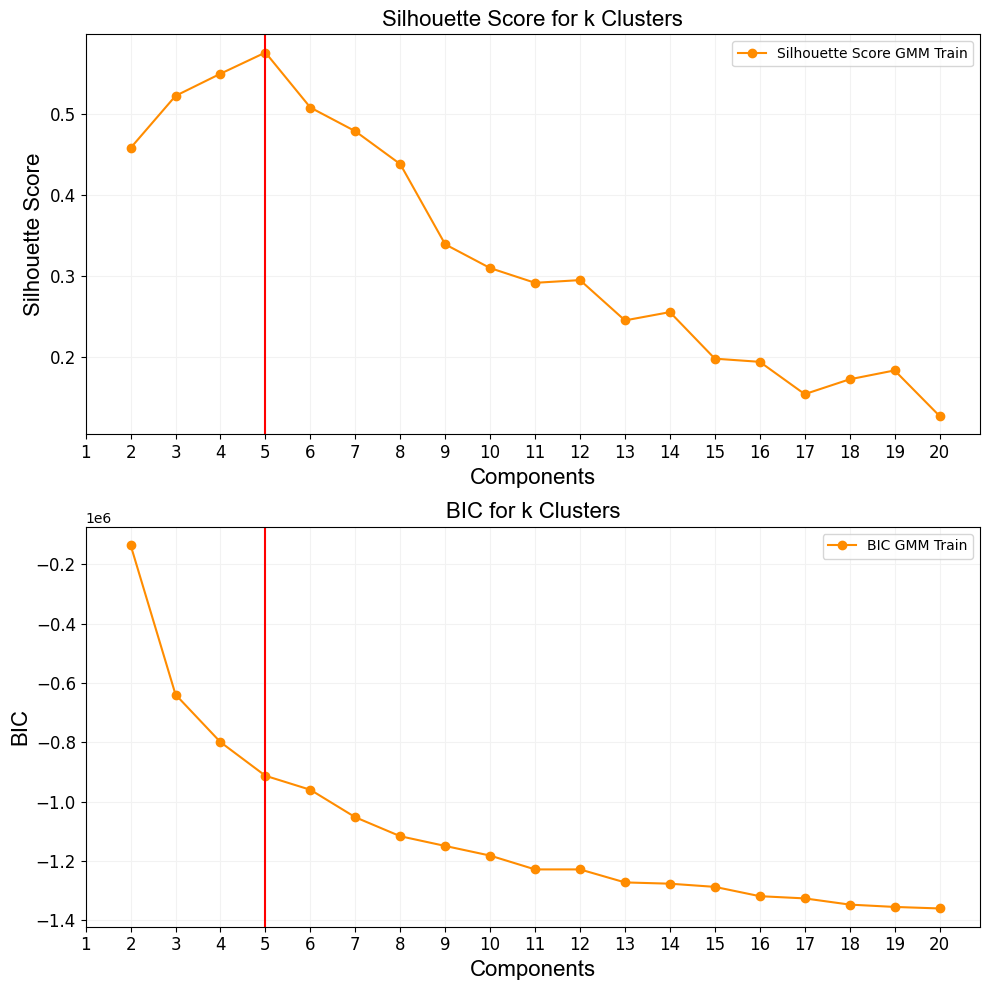

In [9]:
fig, axs = plt.subplots(2,1, figsize=(10,10))
font = {'family': 'arial',
        'color':  'black',
        'weight': 'normal',
        'size': 16,
        }
axs[0].plot(n_components, average_score, label="Silhouette Score GMM Train", color ="darkorange", marker="o")
#axs[0].plot(frame2["Cluster"], frame2["Silhouette Score"], label="Silhouette Score K-Means 1-9 Test", color ="darkred", marker="o")

axs[1].plot(n_components, criteria, label="BIC GMM Train", color ="darkorange", marker="o")
#axs[1].plot(frame2["Cluster"], frame2["Inertia"], label="Inertia K-Means 1-9 Test", color ="darkred", marker="o")

axs[0].set_xlabel("Components", fontdict=font)
axs[0].set_ylabel("Silhouette Score", fontdict=font)
axs[0].set_xticks(range(1,20+1,1))
axs[0].legend() 
axs[0].set_title("Silhouette Score for k Clusters", fontdict=font)
axs[0].axvline(x=5, color='red', linestyle='-')    

axs[1].set_xlabel("Components", fontdict=font)
axs[1].set_ylabel("BIC", fontdict=font)
axs[1].set_xticks(range(1,20+1,1))
axs[1].legend() 
axs[1].set_title("BIC for k Clusters", fontdict=font)
axs[1].axvline(x=5, color='red', linestyle='-')    

axs[0].grid(color="0.95")
axs[1].grid(color="0.95")
for ax in axs:
    ax.tick_params(axis='x', labelsize=12)
    ax.tick_params(axis='y', labelsize=12)

plt.tight_layout()
path = "S-Score_BIC_2-2_2-9"
plt.savefig(path)
plt.show()   
    

### Visualisation of Clustering
Above, the Silhouette Scores and Inertia values were calculated and plotted for each dimensionality reduction methods. The best fitting number of clusters per method can be easily derived from the plots by extracting the maximum of the Silhouette Score and identifying the elbow of the Inertia values. Hence, 7 Clusters were selected as the best number of clusters.

C:\Users\lgbbe\AppData\Local\Temp\ipykernel_15984\3615221333.py:3: MatplotlibDeprecationWarning:

The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.



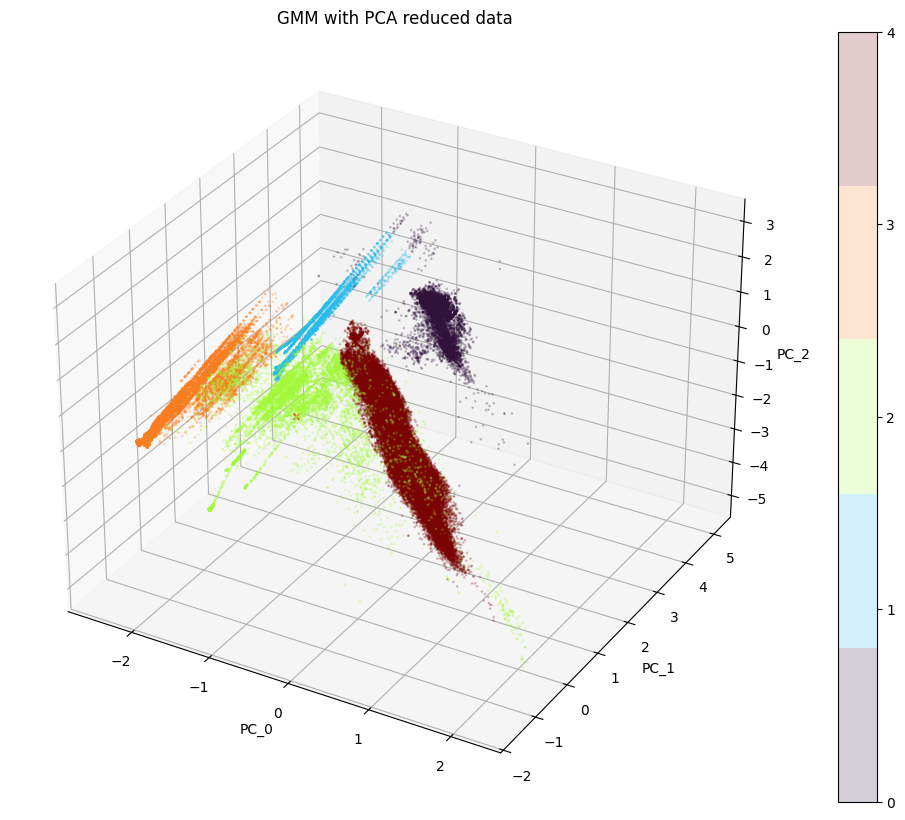

In [6]:

# Fit Gaussian Mixture Model
clusters = 5
cmap = plt.cm.get_cmap("turbo", clusters)

gmm = GaussianMixture(n_components=clusters, max_iter=50, n_init=20, init_params="k-means++", random_state=42, tol=0.0001)
gmm.fit(train_pca.values)
path = "GMM_pca_"+run+"1.pkl"
joblib.dump(gmm,path)
# Predict cluster labels
labels = gmm.predict(train_pca.values)
train_df["GMM"] = labels
test_df["GMM"] = gmm.predict(test_pca.values)
validate_df["GMM"] = gmm.predict(validate_pca.values)

df_list = [train_df, test_df, validate_df]

# Get cluster means and covariance matrices
means = gmm.means_
covariances = gmm.covariances_

fig = plt.figure(figsize=(15, 10))
ax = fig.add_subplot(projection="3d")

x = train_pca.iloc[:,0]
y = train_pca.iloc[:,1]
z = train_pca.iloc[:,2]
ax.set_xlabel("PC_0")
ax.set_ylabel("PC_1")
ax.set_zlabel("PC_2")
# Plot the data points with colors representing the clusters
p = ax.scatter(x,y,z, c=labels,s=1, alpha=0.2 ,cmap=cmap)
ax.scatter(means[:, 0], means[:, 1], means[:,2], marker='x', color='r', label='Cluster Centers')
left, bottom, width, height = 0.1, 0.1, 0.8, 0.8
plt.title("GMM with PCA reduced data")
ax.set_position([left, bottom, width, height])
plt.colorbar(p, ticks=range(clusters))
plt.show()

In [7]:
def get_score(model, df, pca_data):
    test_score = model.score_samples(pca_data.values)
    df["score"] = test_score

    for k in df["GMM"].unique():
        #for alert in df["Alert"].unique():
        df.loc[(df["GMM"] == k), "score_mean"] = df.loc[(df["GMM"] == k),"score"].mean() #& (df["Alert"] == alert)
    metric = df[["GMM","score_mean"]].value_counts() 
    
    return  df, metric

result_df, metric = get_score(gmm, train_df, train_pca)

In [8]:
def recombine_df(model, df_list, pca_list):
    
    result_list = []
    for i in range(0,len(df_list)):
        print(i)
        temp_df, temp_metric = get_score(model, df_list[i], pca_list[i])
        result_list.append(temp_df)
        print(temp_metric)
    
    comb_df = pd.concat(result_list, join = "outer")
    comb_df.sort_index(inplace=True)
    
    return comb_df

In [9]:
comb_df = recombine_df(gmm, df_list, pca_list)

0
GMM  score_mean
4     3.779480     115753
3     3.417877      25837
2    -5.035578      10748
0    -3.746483       8068
1     2.681928       5825
Name: count, dtype: int64
1
GMM  score_mean
4     3.819926     13653
3     3.404220      2986
2    -4.963281      1245
0    -3.941944       988
1     2.769365       685
Name: count, dtype: int64
2
GMM  score_mean
4     3.786102     6816
3     3.391178     1505
2    -4.852988      651
0    -3.772056      458
1     2.595046      349
Name: count, dtype: int64


In [10]:
# Define a dictionary to map Alerts values to symbols
alerts_to_symbol = {
    0: "circle-open",    
    1: "circle-open",    
    2: "circle",
    3: "diamond",
    4: "square" # Add more mappings as needed for other alert values
}
comb_df["Symbol"] = comb_df["Alert"].map(alerts_to_symbol)
sample_df = comb_df.sample(20000)

fig = go.Figure(data=[go.Scatter3d(x=sample_df["pca0"],y=sample_df["pca1"],z=sample_df["pca2"],mode="markers",
                                   marker = dict(
                                        size=3,
                                        color=sample_df["GMM"],
                                        cmax=sample_df["GMM"].max(),
                                        cmin=0,
                                        colorbar=dict(title="Cluster"),
                                        colorscale="turbo",
                                        symbol=sample_df["Symbol"],
                                        opacity=0.5
                                   ))])

fig.update_layout(
    width=1200,  # Set the width of the plot in pixels
    height=800,  # Set the height of the plot in pixels
    font=dict(
        family="Arial",
        size=14,
        color="Black"
    )
)
iplot(fig, filename="cluster_gmm")

### Analysing Clustering

<div stlye="text-align:justify">
The plot of the clustering above seems to identify different pump states because a clear separation of the clusters is visible. It is also noteworthy, that the GMM algorithm seems to be advantegous in identifying the different groups of data since it is visible that the colored cluster capture the shape of the data in the three dimensional space. The KMeans algorithm proves to be disadvantegous in the identifying the shape of the data groups. This can be explained by the differences in the algorithms itself. While GMM determines the clusters based on a mixture of several gaussian distribution and thereby suitable to identify clusters of different shapes and sizes, the KMeans algorithm is limited to spherical clusters with centroids as center that determine the clusters. Thus, the KMeans algorithm is not optimal in identifying the groups of data as seen in the plot above.  Therefore, the clustering needs to be further analysed based on the clustering of significant features, like the type of pump, serial number, and the P_In and T_Out values. To identify how the clusters were build, the data will be retransformed into their numerical values and the clusters will be used to identify their characteristics.

<div>

In [11]:
dist = pd.DataFrame(columns=["Train","Test"])
dist["Train"] = train_df["GMM"].value_counts() / len(train_df)
dist["Test"] = test_df["GMM"].value_counts() / len(test_df)
dist["Validate"] = validate_df["GMM"].value_counts() / len(validate_df)
dist = (dist*100).round(2)
dist

,Train,Test,Validate
GMM,,,
4,69.63,69.81,69.70
3,15.54,15.27,15.39
2,6.47,6.37,6.66
0,4.85,5.05,4.68
1,3.50,3.50,3.57


In [13]:
if "Symbol" in train_df.columns:
    train_df.drop(columns=["Symbol"], inplace=True)

if "Symbol" in test_df.columns:
    test_df.drop(columns=["Symbol"], inplace=True)

    
result_data = comb_df
run ="9"
path = "result_data_"+str(run)+".csv"

result_data.to_csv(path, index=False)

In [14]:
result_data["GMM"].value_counts()

GMM
4    136222
3     30328
2     12644
0      9514
1      6859
Name: count, dtype: int64

In [15]:
result_data.loc[result_data["Alert"]==4, "score"].min()

np.float64(-223.58246682054772)

In [16]:
data_pca = result_data.copy()
parameter_comb = {
        "0":["P_In","P_Out","T_Out","Current","MotorSpeed","Power"],
        "1":["P_In","P_Out","T_Out","Current","MotorSpeed","Power","RunningHours","TotalCO2Impact","TotalEnergyConsumption"],
        "2":["P_In","P_Out","T_Out","Current","MotorSpeed","Power","dT","dE","dCO2"],
        "3":["P_In","P_Out","T_Out","Current","MotorSpeed","Power","dT","dE","dCO2","Alert","Reopen count"],
        "4":["P_In","P_Out","T_Out","Current","MotorSpeed","Power","dT","dE","dCO2","Alert","Reopen count","PressureRange"],
        "5":["P_In","P_Out","T_Out","Current","MotorSpeed","Power","dT","dE","dCO2","Alert","Reopen count","dP"],
        "6":["P_In","P_Out","T_Out","Current","MotorSpeed","Power","dT","dE","Alert","Reopen count"],
        "7":["P_In","P_Out","T_Out","Current","MotorSpeed","Power","dT","dE","Alert","Reopen count","PressureRange"],
        "8":["P_In","P_Out","T_Out","Current","MotorSpeed","Power","dT","dE","Alert","Reopen count","dP"],
        "9":["P_In","P_Out","T_Out","Current","MotorSpeed","Power","dE","Alert","Reopen count","dP"],
    }

data = data_pca[parameter_comb["9"]]
temp = data_pca[["GMM","score"]]
data.loc[:,["GMM","score"]] = temp

In [17]:
def get_definition(data, name):
    # This code is used to iterate through the clusters of the dataset and get their statistics
    df_list = []
    for cluster in pd.unique(data[name]):
        metric = data.loc[data[name]==cluster].describe().round(2)
        metric.index = pd.MultiIndex.from_product([[cluster], metric.index])
        df_list.append(metric)
        
        result_df = pd.concat(df_list, axis=0)
        result_df = result_df.sort_index(axis=0)
    
    return result_df    

m_df = get_definition(train_df, "GMM")
path = "cluster_description_GMM_PCA_"+run+"1.xlsx"
m_df.to_excel(path)

In [18]:
import matplotlib as mpl
from matplotlib.colors import Normalize

def plot_cluster(data, pump, cluster,r1,r2):
    
    try:
        fig, axs = plt.subplots(9,1, figsize=(20,40))
        
        start_time = r1
        end_time = r2 
        
        filtered_df = data[(data['TimeStamp'] >= start_time) & (data['TimeStamp'] <= end_time) & (data['SnCode'] == pump)]

        k = data[cluster].max()+1    
        cmap = mpl.cm.get_cmap("turbo", k)
    
        norm = Normalize(vmin=0, vmax=data[cluster].unique().max())
        
        sc1 = axs[0].scatter(filtered_df["TimeStamp"],filtered_df["Power"], c=filtered_df[cluster], cmap=cmap, s=3, norm=norm)
        axs[0].set_ylabel("Power [kW]")
        axs[0].set_title(f"{cluster} Parameters\nPower of pump {pump} from {start_time} to {end_time}")
        cbar1 = fig.colorbar(sc1, ax=axs[0])
        cbar1.set_label('Clusters')
    
        sc2 = axs[1].scatter(filtered_df["TimeStamp"],filtered_df["P_In"], c=filtered_df[cluster], cmap=cmap, s=3, norm=norm)
        axs[1].set_ylabel("P_In [mbar]")
        axs[1].set_title(f"P_In of pump {pump} from {start_time} to {end_time}")
        cbar2 = fig.colorbar(sc2, ax=axs[1])
        cbar2.set_label('Clusters')
        
        sc3 = axs[2].scatter(filtered_df["TimeStamp"],filtered_df["T_Out"], c=filtered_df[cluster], cmap=cmap, s=3, norm=norm)
        axs[2].set_ylabel("T_Out [°C]")
        axs[2].set_title(f"T_Out of pump {pump} from {start_time} to {end_time}")
        cbar3 = fig.colorbar(sc3, ax=axs[2])
        cbar3.set_label('Clusters')
        
        sc4 = axs[3].scatter(filtered_df["TimeStamp"],filtered_df["MotorSpeed"], c=filtered_df[cluster], cmap=cmap, s=3, norm=norm)
        axs[3].set_ylabel("MotorSpeed [rpm]")
        axs[3].set_title(f"MotorSpeed of pump {pump} from {start_time} to {end_time}")
        cbar4 = fig.colorbar(sc4, ax=axs[3])
        cbar4.set_label('Clusters')
        
        sc5 = axs[4].scatter(filtered_df["TimeStamp"],filtered_df["pca0"], c=filtered_df[cluster], cmap=cmap, s=3, norm=norm)
        #axs[4].plot(filtered_df["TimeStamp"],filtered_df["pca0_mean"], color="darkred",linestyle="-", alpha=0.5)
        axs[4].set_ylabel("Principle Component 0")
        axs[4].set_title(f"Principle Component 0 of pump {pump} from {start_time} to {end_time}")
        cbar5 = fig.colorbar(sc5, ax=axs[4])
        cbar5.set_label('Clusters')
        
        sc6 = axs[5].scatter(filtered_df["TimeStamp"],filtered_df["pca1"], c=filtered_df[cluster], cmap=cmap, s=3, norm=norm)
        #axs[5].plot(filtered_df["TimeStamp"],filtered_df["pca1_mean"], color="darkred",linestyle="-", alpha=0.5)
        axs[5].set_ylabel("Principle Component 1")
        axs[5].set_title(f"Principle Component 1 of pump {pump} from {start_time} to {end_time}")
        cbar6 = fig.colorbar(sc6, ax=axs[5])
        cbar6.set_label('Clusters')
        
        sc7 = axs[6].scatter(filtered_df["TimeStamp"],filtered_df["pca2"], c=filtered_df[cluster], cmap=cmap, s=3, norm=norm)
        #axs[6].plot(filtered_df["TimeStamp"],filtered_df["pca2_mean"], color="darkred",linestyle="-", alpha=0.5)
        axs[6].set_ylabel("Principle Component 2")
        axs[6].set_title(f"Principle Component 2 of pump {pump} from {start_time} to {end_time}")
        cbar7 = fig.colorbar(sc7, ax=axs[6])
        cbar7.set_label('Clusters')
        
        sc8 = axs[7].scatter(filtered_df["TimeStamp"],filtered_df["pca3"], c=filtered_df[cluster], cmap=cmap, s=3,norm=norm)
        #axs[7].plot(filtered_df["TimeStamp"],filtered_df["pca3_mean"], color="darkred",linestyle="-", alpha=0.5)
        axs[7].set_ylabel("Principle Component 3")
        axs[7].set_title(f"Principle Component 3 of pump {pump} from {start_time} to {end_time}")
        cbar8 = fig.colorbar(sc8, ax=axs[7])
        cbar8.set_label('Clusters')
        
        sc9 = axs[8].scatter(filtered_df["TimeStamp"],filtered_df["score"], c=filtered_df[cluster], cmap=cmap, s=3, norm=norm)
        #axs[7].plot(filtered_df["TimeStamp"],filtered_df["pca3_mean"], color="darkred",linestyle="-", alpha=0.5)
        axs[8].set_ylabel("GMM Score")
        axs[8].set_title(f"GMM Score of pump {pump} from {start_time} to {end_time}")
        cbar8 = fig.colorbar(sc9, ax=axs[8])
        cbar8.set_label('Clusters')
        
        #sc9 = axs[8].plot(filtered_df["TimeStamp"],filtered_df["pca0"], label="pca0", c="green")
        #sc9 = axs[8].plot(filtered_df["TimeStamp"],filtered_df["pca1"], label="pca1", c="blue")
        #sc9 = axs[8].plot(filtered_df["TimeStamp"],filtered_df["pca2"], label="pca2", c="orange")
        #sc9 = axs[8].plot(filtered_df["TimeStamp"],filtered_df["pca3"], label="pca3", c="magenta")
        #axs[8].set_ylabel("Principle Components")
        #axs[8].set_title(f"Principle Component of pump {pump} from {start_time} to {end_time}")
    except KeyError as err:
        print(f"A KeyError occured: {err}")
    
    return plt.show()


In [19]:
# prepare data of interest
cluster_DF = data_pca.copy()
cluster_DF["TimeStamp"] = pd.to_datetime(data_pca["TimeStamp"])

cluster_DF[["pca0_mean","pca1_mean","pca2_mean","pca3_mean"]] = cluster_DF[["pca0","pca1","pca2","pca3"]].rolling(window=35,min_periods=1, win_type='triang', closed="left").mean() #

In [20]:
print(cluster_DF["SnCode"].value_counts())

SnCode
44    195567
Name: count, dtype: int64


In [21]:
pump = 44

max = cluster_DF.loc[cluster_DF["SnCode"]==pump,["TimeStamp"]].max()
min = cluster_DF.loc[cluster_DF["SnCode"]==pump,["TimeStamp"]].min()
print(f"min: {min}\nmax: {max}")

min: TimeStamp   2023-02-23 11:58:01
dtype: datetime64[ns]
max: TimeStamp   2023-10-25 07:01:12
dtype: datetime64[ns]


C:\Users\lgbbe\AppData\Local\Temp\ipykernel_15984\797291275.py:15: MatplotlibDeprecationWarning:

The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.



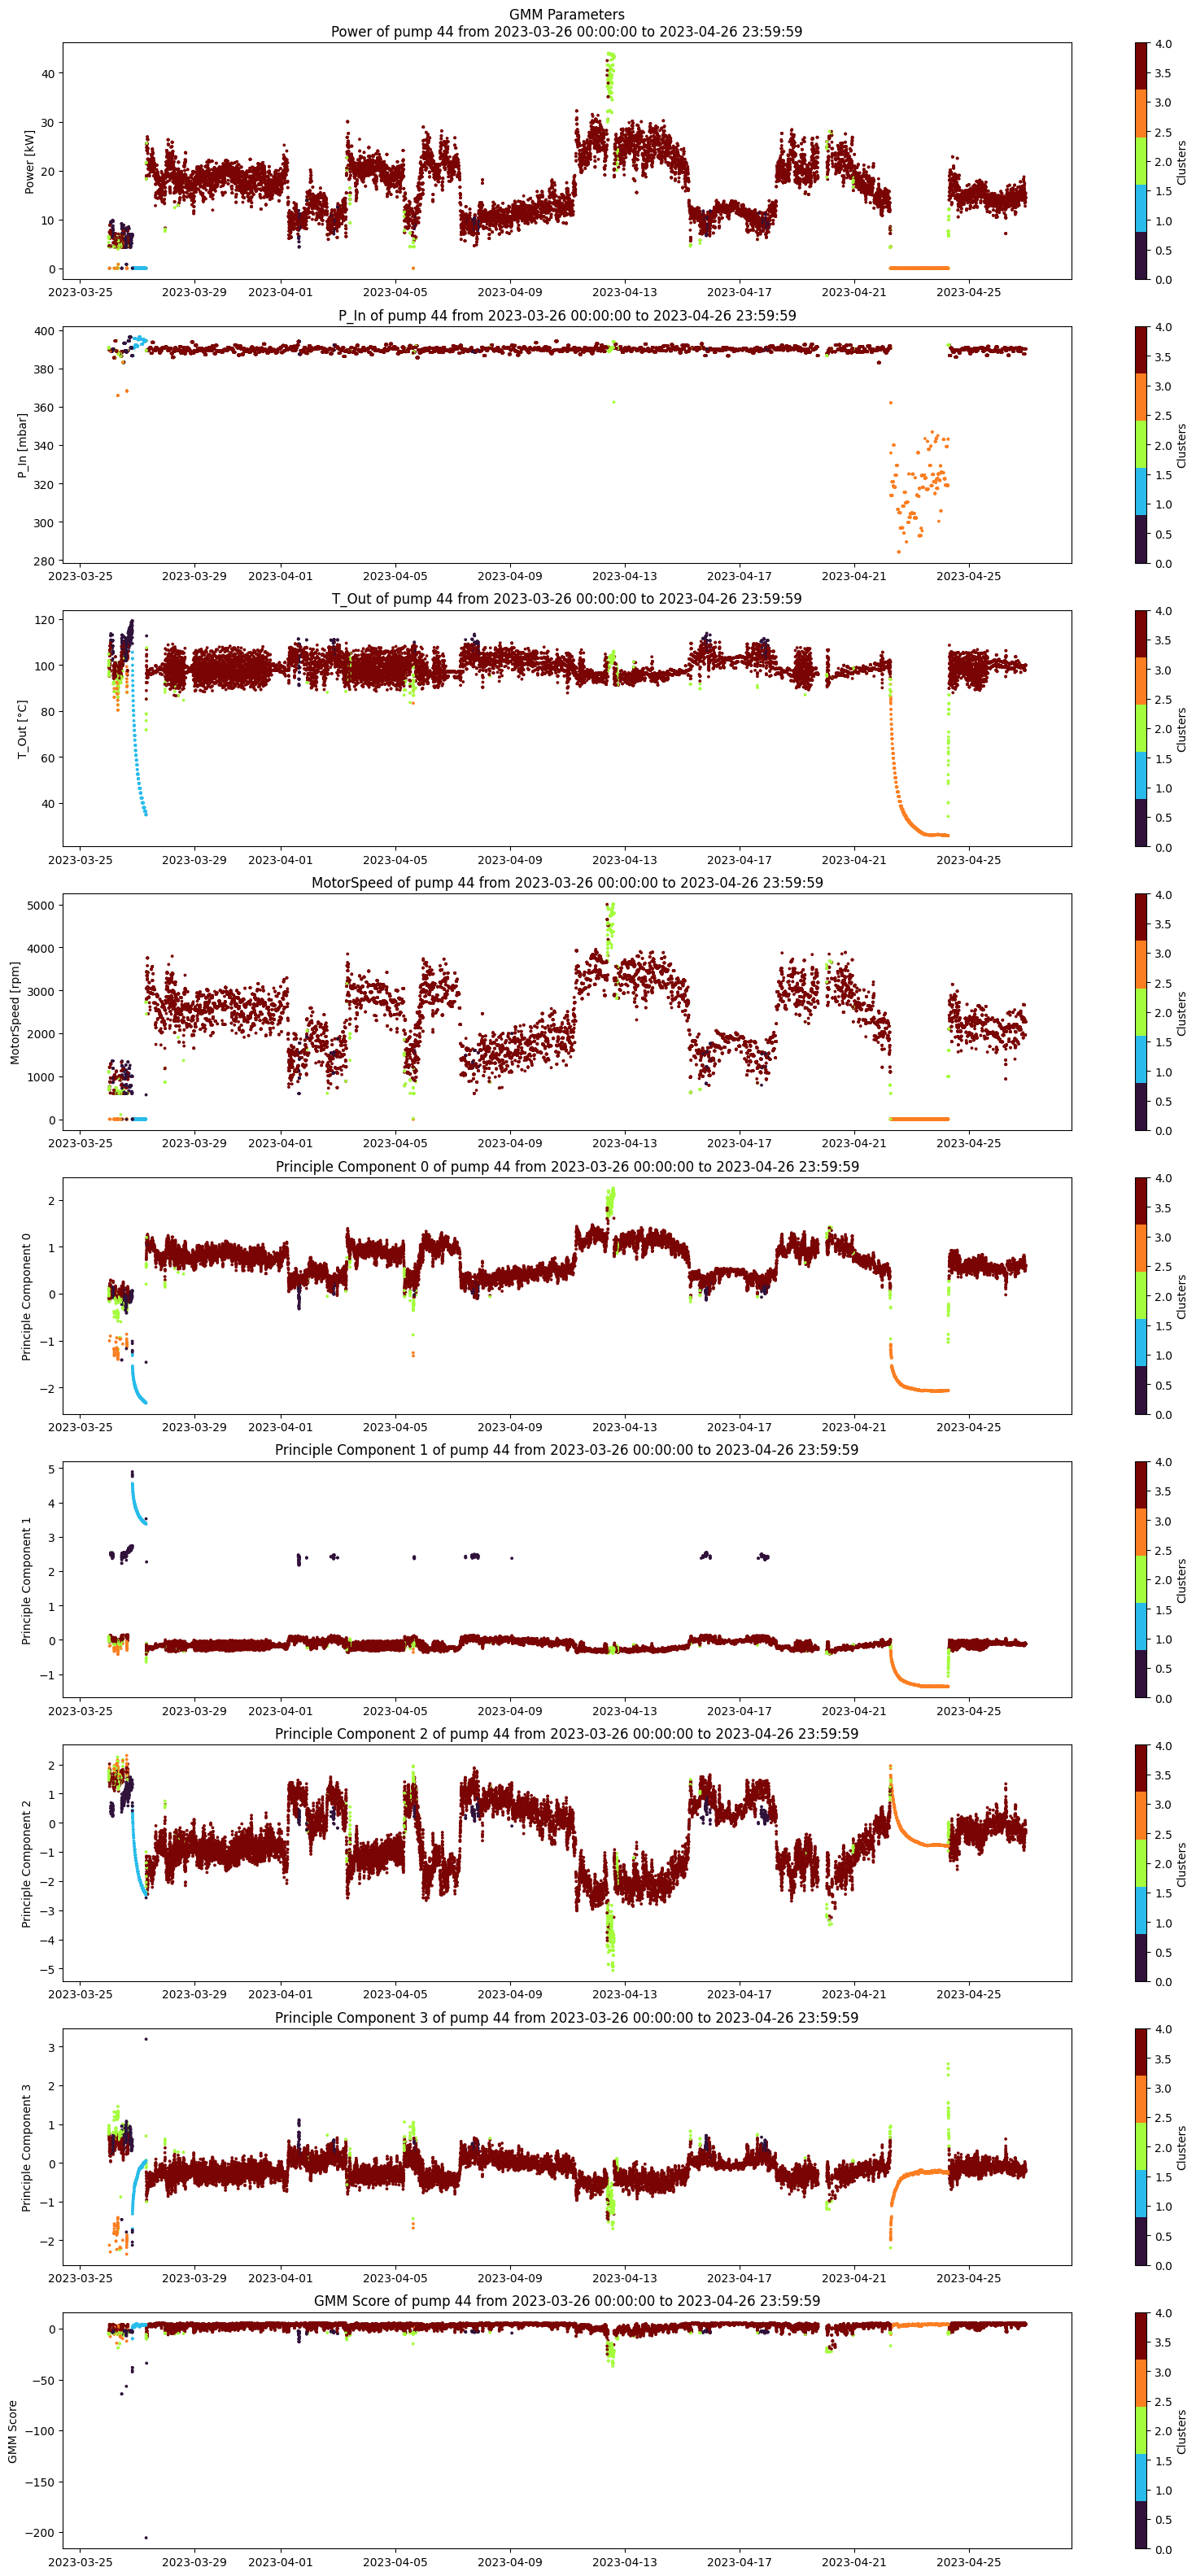

In [22]:
plot_cluster(cluster_DF,pump,"GMM","2023-03-26 00:00:00","2023-04-26 23:59:59")